# AIDM7370 AI Theories and Applications
# Search Algorithms

## Exercise 1 - Uninformed Search
Implementation of the basic uninformed search algorithms using `NetworkX`library

+ Name ： Chen Xiaoqi
+ Student Id：20465106

In [1]:
# Install NetworkX, Matplotlib, Pandas, Numpy using pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Visit the graph using Depth First Algorithm

## Using our algorithm

### Basic DFS

In [14]:
def DFS(graph, startNode, endNode, maxSteps):
    # Initialisation
    frontier = []
    step = 0
    for node in graph.nodes:
        graph.nodes[node]['parent'] = False
        
    # Setup starting point, root of the tree
    frontier.append(startNode)
    graph.nodes[startNode]['parent'] = None
    
    # Execute until there are nodes to be visited
    while frontier:
        print('Frontier:', frontier)
        
        #Extract a node from the frontier and visit the node
        currentNode = frontier.pop()
        step += 1
        
        # Check goal
        if not(currentNode == endNode): 
            # Check condition
            if step <= maxSteps:
                print(currentNode, " -> ")
                
                # Add to frontier neighbouring nodes
                for neighbour in graph.adj[currentNode]:
                    frontier.append(neighbour)
                    graph.nodes[neighbour]['parent'] = currentNode
            else:
                print(" Execution ended without reaching the goal")
                break
        else:
            print(currentNode, " *GOAL* - Number of steps:", step)
            break
        
    print("- End")
    return graph

### Improved DFS

In [15]:
def DFS_with_loop_prevention(graph, startNode, endNode, maxSteps):
    # Initialization
    # Use visited flag on each node to find if we should consider it for fring expansion
    frontier = []
    step = 0
    for node in graph.nodes:
        graph.nodes[node]['parent'] = False
        graph.nodes[node]['visited'] = False

        
    # Setup starting point, root of the tree
    frontier.append(startNode)
    graph.nodes[startNode]['parent'] = None
    #graph.nodes[startNode]['visited'] = True
    print(startNode, " -> ")
    
    # Execute until there are nodes to be visited
    while frontier:
        print('Frontier:', frontier)
        
        #Extract a node from the frontier and visit the node
        currentNode = frontier.pop()
        if graph.nodes[currentNode]['visited'] == False: # Why this is needed????
            step += 1

            # Check goal
            if not(currentNode == endNode): 
                # Check condition
                if step <= maxSteps:
                    # Update the visited flag if needed
                    if(not graph.nodes[currentNode]['visited']):
                        print("current node: ", currentNode, " -> ")
                        graph.nodes[currentNode]['visited'] = True

                    # Add to frontier neighbouring nodes, if not visited
                    for neighbour in graph.adj[currentNode]:
                        if not graph.nodes[neighbour]['visited']:
                            frontier.append(neighbour)
                            graph.nodes[neighbour]['parent'] = currentNode
                else:
                    print(" Execution ended without reaching the goal")
                    break
            else:
                print(currentNode, " *GOAL* - Number of steps:", step)
                break
        
    print(" - End")
    return graph

# Travelling in Romania 

## Romania road map graph
Import the adjacency matrix from CSV file. 

In [6]:
import pandas as pd
import numpy as np
dfRomania = pd.read_csv('../data/' + 'romania.csv')

Change NA to 0, needed for NetworkX graph.

In [7]:
dfRomania.fillna(0, inplace=True)
dfRomania.set_index('city', inplace = True)
dfRomania

,Arad,Bucharest,Craiova,Drobeta,Eforie,Fagaras,Giurgiu,Hirsova,Iasi,Lugoj,Mehadia,Neamt,Oradea,Pitesti,Rimnicu,Sibiu,Timisoara,Urziceni,Vaslui,Zerind
city,,,,,,,,,,,,,,,,,,,,
Arad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,118.0,0.0,0.0,75.0
Bucharest,0.0,0.0,0.0,0.0,0.0,211.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,0.0,0.0,0.0,85.0,0.0,0.0
Craiova,0.0,0.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.0,146.0,0.0,0.0,0.0,0.0,0.0
Drobeta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eforie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fagaras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0
Giurgiu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hirsova,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0
Iasi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,0.0


Convert Pandas DataFrame to NetworkX Graph

In [8]:
romaniaMap = nx.from_pandas_adjacency(dfRomania, nx.Graph)

In [9]:
romaniaMap.edges(data=True)

EdgeDataView([('Arad', 'Sibiu', {'weight': 140.0}), ('Arad', 'Timisoara', {'weight': 118.0}), ('Arad', 'Zerind', {'weight': 75.0}), ('Bucharest', 'Fagaras', {'weight': 211.0}), ('Bucharest', 'Giurgiu', {'weight': 90.0}), ('Bucharest', 'Pitesti', {'weight': 101.0}), ('Bucharest', 'Urziceni', {'weight': 85.0}), ('Craiova', 'Drobeta', {'weight': 120.0}), ('Craiova', 'Pitesti', {'weight': 138.0}), ('Craiova', 'Rimnicu', {'weight': 146.0}), ('Drobeta', 'Mehadia', {'weight': 75.0}), ('Eforie', 'Hirsova', {'weight': 86.0}), ('Fagaras', 'Sibiu', {'weight': 99.0}), ('Hirsova', 'Urziceni', {'weight': 98.0}), ('Iasi', 'Neamt', {'weight': 87.0}), ('Iasi', 'Vaslui', {'weight': 92.0}), ('Lugoj', 'Mehadia', {'weight': 70.0}), ('Lugoj', 'Timisoara', {'weight': 111.0}), ('Oradea', 'Sibiu', {'weight': 151.0}), ('Oradea', 'Zerind', {'weight': 71.0}), ('Pitesti', 'Rimnicu', {'weight': 97.0}), ('Rimnicu', 'Sibiu', {'weight': 80.0}), ('Urziceni', 'Vaslui', {'weight': 142.0})])

In [10]:
edgesToRemove = []
for edge in romaniaMap.edges(data=True):
    start = edge[0]
    end = edge[1]
    weight = edge[2]['weight']
    if np.isnan(weight):
        print(edge)
        edgesToRemove.append( (start,end) )

romaniaMap.remove_edges_from(edgesToRemove)

Display the roadmap

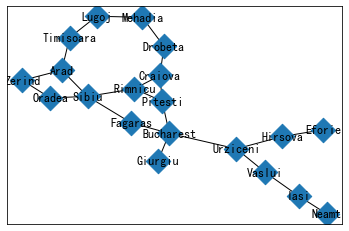

In [11]:
layout=nx.spring_layout(romaniaMap)
nx.draw_networkx(romaniaMap, layout, node_shape='D', with_labels=True)

## Visit the graph using the various strategies

In [16]:
visitedGraph = DFS(romaniaMap, 'Arad', 'Bucharest', 100)

Frontier: ['Arad']
Arad  -> 
Frontier: ['Sibiu', 'Timisoara', 'Zerind']
Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Oradea']
Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Zerind']
Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Oradea']
Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Zerind']
Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Oradea']
Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Zerind']
Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Oradea']
Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Zerind']
Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Oradea']
Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 

In [17]:
visitedGraph = DFS_with_loop_prevention(romaniaMap, 'Arad', 'Bucharest', 100)

Arad  -> 
Frontier: ['Arad']
current node:  Arad  -> 
Frontier: ['Sibiu', 'Timisoara', 'Zerind']
current node:  Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Oradea']
current node:  Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Sibiu']
current node:  Sibiu  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Rimnicu']
current node:  Rimnicu  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Pitesti']
current node:  Pitesti  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Craiova']
current node:  Craiova  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Drobeta']
current node:  Drobeta  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Mehadia']
current node:  Mehadia  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Lugoj']
current node:  Lugoj  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Timisoara']
current node:  Timisoara  -> 
Frontier: ['Sibiu', 'Timis

In [18]:
visitedGraph.edges(data=True)

EdgeDataView([('Arad', 'Sibiu', {'weight': 140.0}), ('Arad', 'Timisoara', {'weight': 118.0}), ('Arad', 'Zerind', {'weight': 75.0}), ('Bucharest', 'Fagaras', {'weight': 211.0}), ('Bucharest', 'Giurgiu', {'weight': 90.0}), ('Bucharest', 'Pitesti', {'weight': 101.0}), ('Bucharest', 'Urziceni', {'weight': 85.0}), ('Craiova', 'Drobeta', {'weight': 120.0}), ('Craiova', 'Pitesti', {'weight': 138.0}), ('Craiova', 'Rimnicu', {'weight': 146.0}), ('Drobeta', 'Mehadia', {'weight': 75.0}), ('Eforie', 'Hirsova', {'weight': 86.0}), ('Fagaras', 'Sibiu', {'weight': 99.0}), ('Hirsova', 'Urziceni', {'weight': 98.0}), ('Iasi', 'Neamt', {'weight': 87.0}), ('Iasi', 'Vaslui', {'weight': 92.0}), ('Lugoj', 'Mehadia', {'weight': 70.0}), ('Lugoj', 'Timisoara', {'weight': 111.0}), ('Oradea', 'Sibiu', {'weight': 151.0}), ('Oradea', 'Zerind', {'weight': 71.0}), ('Pitesti', 'Rimnicu', {'weight': 97.0}), ('Rimnicu', 'Sibiu', {'weight': 80.0}), ('Urziceni', 'Vaslui', {'weight': 142.0})])

# Task
Plese finish the following tasks, and submit Jupyter notebook file **with output** to Moodle.\
Due date: 23:59, 2 Feb, 2021\
Late submission penalty: a reduction by 25% for each day.
## Task 1 (10 marks)
The distance between the cities directly connected in the map is stored in the `weight` attribute of each edge.
Modify and rename the `DFS` function to display the following informaion:
1. at each step, the distance that has been travelled by the algorithm
1. at the end of the search process, the path from start node to end node 
2. the total distance of this path 

Modify and rename the `DFS_with_loop_prevention` function, to avoid duplicated nodes in the frontier list, and to display the following informaion:
1. at each step, the distance that has been travelled by the algorithm
1. at the end of the search process, the path from start node to end node 
2. the total distance of this path 

Then call the modified functions to find path from 'Arad' to 'Bucharest'.

In [25]:
def DFS_One(graph, startNode, endNode, maxSteps):
    # Initialisation
    frontier = []
    step = 0
    Step_distance = 0
    Total_distance = 0
    
    for node in graph.nodes:
        graph.nodes[node]['parent'] = False
        
    # Setup starting point, root of the tree
    frontier.append(startNode)
    graph.nodes[startNode]['parent'] = None
    
    # Execute until there are nodes to be visited
    while frontier:
        print('Frontier:', frontier)
        
        #Extract a node from the frontier and visit the node
        currentNode = frontier.pop()
        step += 1
        #count the distance
        if not graph.nodes[currentNode]['parent'] == None: 
                Step_distance = graph.edges[currentNode, graph.nodes[currentNode]['parent']]['weight']
                print('Distance:', Step_distance)
                Total_distance = Total_distance + Step_distance
            
        else:
                print('No parent')
        
        # Check goal
        if not(currentNode == endNode): 
            # Check condition
            if step <= maxSteps:
                print(currentNode, " -> ")
                
                # Add to frontier neighbouring nodes
                for neighbour in graph.adj[currentNode]:
                    frontier.append(neighbour)
                    graph.nodes[neighbour]['parent'] = currentNode
            else:
                print(" Execution ended without reaching the goal")
                
                print('Total distance is', Total_distance ) 
                break
        else:
            print(currentNode, " *GOAL* - Number of steps:", step)
            
            print('Total distance is', Total_distance)
            break
    
    if currentNode != endNode:
        print("The end point was not reached")

    print("- End")
    return graph

In [26]:
route = DFS_One(romaniaMap,"Arad" , "Bucharest", 100)

Frontier: ['Arad']
No parent
Arad  -> 
Frontier: ['Sibiu', 'Timisoara', 'Zerind']
Distance: 75.0
Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Oradea']
Distance: 71.0
Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Zerind']
Distance: 71.0
Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Oradea']
Distance: 71.0
Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Zerind']
Distance: 71.0
Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Oradea']
Distance: 71.0
Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Zerind']
Distance: 71.0
Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Oradea']
Distance: 71.0
Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Arad', 'Sibiu', 'Zerind']
Distance: 71.0
Zerind  -> 
Frontier: ['Sibiu', 'Timiso

In [58]:
def DFS_with_loop_prevention1(graph, startNode, endNode, maxSteps):
    # Initialization
    # Use visited flag on each node to find if we should consider it for fring expansion
    frontier = []
    step = 0 # step number
    result = True   
    Step_distance = 0 # The distance of each step
    Total_distance = 0 #Total distance
    
    
    for node in graph.nodes:
        graph.nodes[node]['parent'] = False
        graph.nodes[node]['visited'] = False
        
    for edge in graph.edges:
        graph.edges[edge]['visited'] = False

        
    # Setup starting point, root of the tree
    frontier.append(startNode)
    graph.nodes[startNode]['parent'] = None
    #graph.nodes[startNode]['visited'] = True
    print(startNode, " -> ")
    
    # Execute until there are nodes to be visited
    while frontier:
        print('Frontier:', frontier)
        
        #Extract a node from the frontier and visit the node
        currentNode = frontier.pop()
        if graph.nodes[currentNode]['visited'] == False: # Why this is needed????
            step += 1
            
            if not graph.nodes[currentNode]['parent'] == None:
                
                #count the distance
                Step_distance = graph.edges[currentNode, graph.nodes[currentNode]['parent']]['weight']
                print('Distance is', Step_distance)
                graph.edges[graph.nodes[currentNode]['parent'],currentNode]['visited'] = True
                Total_distance = Total_distance + Step_distance
            
            else:
                print('No parent')
            
            

            # Check goal
            
            if not(currentNode == endNode): 
                # Check condition
                if step <= maxSteps:
                    # Update the visited flag if needed
                    if(not graph.nodes[currentNode]['visited']):
                        print("current node: ", currentNode, " -> ")
                        graph.nodes[currentNode]['visited'] = True

                    # Add to frontier neighbouring nodes, if not visited
                    for neighbour in graph.adj[currentNode]:
                        if not graph.nodes[neighbour]['visited']:
                            frontier.append(neighbour)
                            graph.nodes[neighbour]['parent'] = currentNode
                else:
                    print(" Execution ended without reaching the goal")
                    result = False 
                    print('Total distance is', Total_distance )                    
                    break
            else:
                print(currentNode, " *GOAL* - Number of steps:", step)
                
                
                print('Total distance is', Total_distance)
                break
    
    #check

    if result:
        totalpath = []
        handNode = endNode
        Distance2 = 0
       
        while result:
            totalpath.insert(0,graph.nodes[handNode]['parent'])
            Distance2 += graph.edges[handNode,graph.nodes[handNode]['parent']]['weight']
            handNode = graph.nodes[handNode]['parent']
            if handNode == startNode:
                break
    
        print(totalpath)
        print('The path from start node to end node is:' + "\n", Distance2)
            
    else:
        print('Cannot move forward')
     
    print(" - End")
    return graph

In [1]:
#test 
#route1 = DFS_with_loop_prevention1(romaniaMap, 'Arad' , 'Bucharest' , 100)

In [59]:
route2 = DFS_with_loop_prevention1(romaniaMap, 'Arad' , 'Bucharest' , 100)

Arad  -> 
Frontier: ['Arad']
No parent
current node:  Arad  -> 
Frontier: ['Sibiu', 'Timisoara', 'Zerind']
Distance is 75.0
current node:  Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Oradea']
Distance is 71.0
current node:  Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Sibiu']
Distance is 151.0
current node:  Sibiu  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Rimnicu']
Distance is 80.0
current node:  Rimnicu  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Pitesti']
Distance is 97.0
current node:  Pitesti  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Craiova']
Distance is 138.0
current node:  Craiova  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Drobeta']
Distance is 120.0
current node:  Drobeta  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Mehadia']
Distance is 75.0
current node:  Mehadia  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Lugoj']
Distance is 70

## Task 2 (5 marks)
Modify and rename `DFS_with_loop_prevention` function. Add a `visited` attribute to the graph `edges`. It should contain boolean values in {`True`, `False`} or {`1`, `0`} depending if the edge has been visited by the algorithm.

Then call the modified functions to find path from 'Arad' to 'Bucharest' and show edges attributes (by visitedGraph.edges(data=True)).

In [60]:
visitedGraph = DFS_with_loop_prevention1(romaniaMap, 'Arad', 'Bucharest', 100)

Arad  -> 
Frontier: ['Arad']
No parent
current node:  Arad  -> 
Frontier: ['Sibiu', 'Timisoara', 'Zerind']
Distance is 75.0
current node:  Zerind  -> 
Frontier: ['Sibiu', 'Timisoara', 'Oradea']
Distance is 71.0
current node:  Oradea  -> 
Frontier: ['Sibiu', 'Timisoara', 'Sibiu']
Distance is 151.0
current node:  Sibiu  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Rimnicu']
Distance is 80.0
current node:  Rimnicu  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Pitesti']
Distance is 97.0
current node:  Pitesti  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Craiova']
Distance is 138.0
current node:  Craiova  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Drobeta']
Distance is 120.0
current node:  Drobeta  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Mehadia']
Distance is 75.0
current node:  Mehadia  -> 
Frontier: ['Sibiu', 'Timisoara', 'Fagaras', 'Craiova', 'Bucharest', 'Lugoj']
Distance is 70

In [61]:
visitedGraph.edges(data=True)

EdgeDataView([('Arad', 'Sibiu', {'weight': 140.0, 'visited': False}), ('Arad', 'Timisoara', {'weight': 118.0, 'visited': False}), ('Arad', 'Zerind', {'weight': 75.0, 'visited': True}), ('Bucharest', 'Fagaras', {'weight': 211.0, 'visited': False}), ('Bucharest', 'Giurgiu', {'weight': 90.0, 'visited': False}), ('Bucharest', 'Pitesti', {'weight': 101.0, 'visited': True}), ('Bucharest', 'Urziceni', {'weight': 85.0, 'visited': False}), ('Craiova', 'Drobeta', {'weight': 120.0, 'visited': True}), ('Craiova', 'Pitesti', {'weight': 138.0, 'visited': True}), ('Craiova', 'Rimnicu', {'weight': 146.0, 'visited': False}), ('Drobeta', 'Mehadia', {'weight': 75.0, 'visited': True}), ('Eforie', 'Hirsova', {'weight': 86.0, 'visited': False}), ('Fagaras', 'Sibiu', {'weight': 99.0, 'visited': False}), ('Hirsova', 'Urziceni', {'weight': 98.0, 'visited': False}), ('Iasi', 'Neamt', {'weight': 87.0, 'visited': False}), ('Iasi', 'Vaslui', {'weight': 92.0, 'visited': False}), ('Lugoj', 'Mehadia', {'weight': 70.0

- The codes in this notebook take insipiration from various sources. All codes are for educational purposes only and released under the CC1.0. 